### NAME : KANCHARLA SAI SIDHARTHA 

+ IMPORTING PYTHON LIBRARIES WHICH ARE IN NEED
+ LINEAR ALGEBRA LIBRARY - NUMPY 
+ DATA ANALYSIS - PANDAS 
+ PLOTTING - MATPLOTLIB AND SEABORN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 + Reading the data set by read_csv() function 

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [14]:
df.shape # 22 rows and 3 columns 

(22, 3)

+ Info() function is used to display the structure of dataset here we can see there are 22 entries and 3 features are mentioned and no null objects 

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


+ Displaying the data set values by head() function which by default shows the first 5 values 

In [5]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

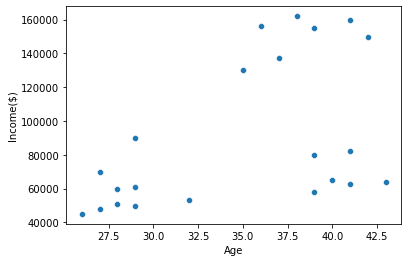

In [10]:
sns.scatterplot(x = df['Age'], y = df['Income($)'], data=df)

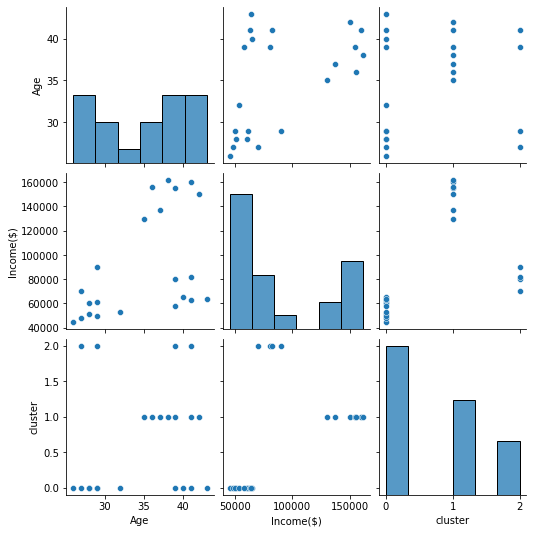

In [37]:
sns.pairplot(df)

+ THIS PAIR PLOT INDICATES THE CLUSTER GRAPHS AND DENOTES THAT THERE ARE 3 CLUSTERS IN DATA SET

+ As we notice by above scatter plot that there are 3 clusters and with less possibility of outliers 

### DATA PREPROCESSING 

+ Let us consider the target features they are age and income from the dataset - Feature Selection (data pre-proccessing)

In [11]:
target = df.iloc[:,[1,2]]

+ Converting the target variables in to an array in order to make our points look like as an array and predict them accordingly 

In [12]:
x = np.array(target)

+ REFERENCE FOR THIS ALOGRITHM 
+ https://www.youtube.com/watch?v=_aWzGGNrcic
+ https://www.kaggle.com/code/adepvenugopal/k-means-classifying-customers-based-on-income

### KMEANS CLUSTTERING

1. scale the data 
2. initialize the centroids 
3. Label data Points
4. update each centroid
5. repeat steps 3 and 4 until centroid stops changing 

+ Step 1 - Scaling the data 
+ with the help of Min Max scaler function from sklearn we can pre proccess the data into the array format and the scaling is done for easy clustering proccess

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [67]:
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

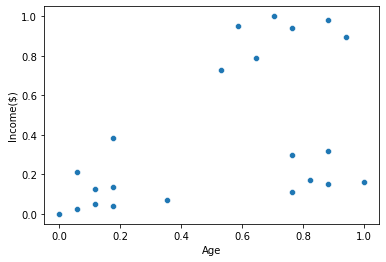

In [68]:
sns.scatterplot(x = df['Age'], y = df['Income($)'], data=df)

+ We can see here three clusters have been formed now the target is to find out the centroids for these points 

In [99]:
target = df.iloc[:,[1,2]]
data = np.array(target)

+ Intializing the centroids with the help of training the data set into a target variable and converting it to an array 

In [100]:
data.shape

(22, 2)

+ The shape of target where its a 2 Dimensional array

In [110]:
data #displaying the data

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

### K MEANS CLUSTTERING

+ FROM SKLEARN LIBRARY IMPORTING THE KMEANS CLUSTER

In [82]:
from sklearn.cluster import KMeans

+ Here we have taken max clusters are 3 as per the scatter plot that is plotted above 

In [105]:
kmeans = KMeans(n_clusters = 3, max_iter = 500, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(data)

+ Cluster centroids are given below for 3 clusters namely

In [106]:
kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

+ Plotting the clustters with the optimal points and aslo the centroids 

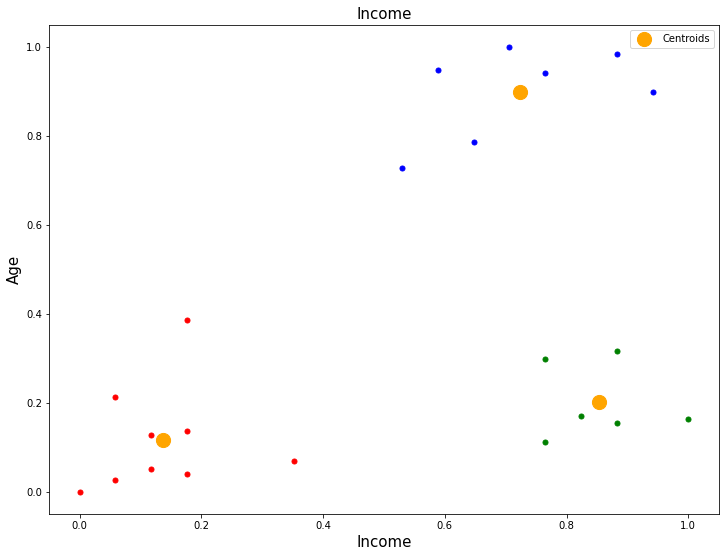

In [107]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

plt.figure(figsize = (12,9))
for i in range(5):
    plt.scatter(data[y_pred == i,0], data[y_pred == i,1], s = point_size, c = colors[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Income',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.legend(loc = 'best')
plt.show()

In [108]:
kmeans.inertia_

0.4750783498553096

# conclusion :
+ 3 clusters are having centroids where the optimal points are also derived from it , from the kmeans it self we got the minimal results and we can see the points are perfectly fitted into each clustter with their centroids 
+ This is what all we will do in kmeans clusttering